https://ml-cheatsheet.readthedocs.io/en/latest/

https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159

https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Descriptive_Statistics-Summary_Tables.pdf

https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas

sns-violinplot
https://www.kaggle.com/haimfeld87/analysis-and-classification-of-mushrooms

neural net on mushroom
https://www.kaggle.com/raghuchaudhary/mushroom-classification

In [34]:
import pandas as pd
import numpy as np
"""
    Step 0: Load the data
"""
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
"""
    Step 1: Obtain basic information about the dataframe
        - how many rows does the dataframe have
        - how many columns does the dataframe have
        - how many unique values does each column contain
        - what are the unique values in each column
        - how many entries in each column are filled (non null)
        - how many entries in each row are filled (non null)
        
    Things to observe:
        - is there any column that corresponds to the 'label', if so, which one
        - is there any degenerate column, e.g., with ony one unique value
        - are there any duplicate rows ? are there any duplicate columns ?
        - is data clean ? does it require further cleaning ?
        - how many columns are numerical/categorical/ordinal ?
        - what are the scales in the numerical columns ?
    
"""
def show_basic_info(df):
    print("There are {} rows and {} columns \n".format(df.shape[0], df.shape[1]))
    columns = df.columns.tolist()
    """
        x.count counts the number of non-null values
    """
    column_counts = df.apply(lambda x: x.count(), axis=0)
    for column in columns:
        print("The column  '{}' has {} non-null values".format(column, column_counts[column]))
        print("The column '{}' has {} unique values".format(column, df[column].nunique()))
        # print("The unique values are: \n {} \n".format(df[column].unique().tolist()))
        print("The unique values and their counts are: \n{} \n".format(df[column].value_counts()))
        
    row_counts = df.apply(lambda x: x.count(), axis=1)    
    print("The number of non-null values in each row are:")
    print(row_counts)
    
"""
    Issue to fix:
    print(row_counts) gives a long result with ... 
    Therefore only a part of the result is visible
    How does one see the entire result ?
"""    

show_basic_info(df)

There are 8124 rows and 23 columns 

The column  'class' has 8124 non-null values
The column 'class' has 2 unique values
The unique values and their counts are: 
e    4208
p    3916
Name: class, dtype: int64 

The column  'cap-shape' has 8124 non-null values
The column 'cap-shape' has 6 unique values
The unique values and their counts are: 
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

The column  'cap-surface' has 8124 non-null values
The column 'cap-surface' has 4 unique values
The unique values and their counts are: 
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 

The column  'cap-color' has 8124 non-null values
The column 'cap-color' has 10 unique values
The unique values and their counts are: 
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 

The column  'bruises' has 8124 non-null values
The column 'bruises' has 2 unique values


In [3]:
"""
    Step 2: Note down your preliminary observations about the data 
"""

"""
    - The data seem to contain only categorical variables
    - The data seems clean: no null entries
    - The column 'class' seems to be the 'label': unique values = ['e', 'p']
    - The 'class' column seem to have balanced distribution: ~50% for both values
    - The column 'veil-type' seems to be degenerate: only one unique value
    - Many columns seem to have skewed distribution
"""

"""
    Can we quantify the skew-ness of a column ?
    Can we automatically detect the skew columns ?
    Are there multiple columns which have strong correlation ?
"""

'.'

'.'

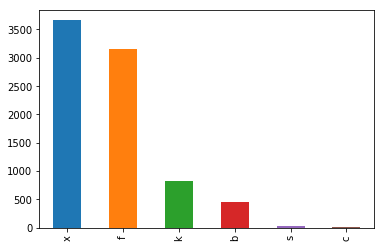

In [5]:
import matplotlib
import matplotlib.pyplot as plt

df['cap-shape'].value_counts().plot(kind='bar')

In [11]:
df.corr(method='spearman')

""


In [19]:
"""
    chisquare correlation between all pairs of categorical variables
"""
from scipy.stats import chisquare

df=df.apply(lambda x : pd.factorize(x)[0])+1

pd.DataFrame([chisquare(df[x].values,f_exp=df.values.T,axis=1)[0] for x in df])

"""
What does chi-square correlation mean ?
"""
'.'

'.'

In [21]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [51]:
import pandas as pd
import numpy as np
import chardet 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from datetime import date

path_to_data = "mushrooms.csv"
df = pd.read_csv(path_to_data)
columns = df.columns.tolist()

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

features = [column for column in columns]
features.remove('veil-type')
features.remove('class')

for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

X = df[features]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_test is {}".format(X_test.shape, y_test.shape))

model = RandomForestClassifier(max_depth=3)

print("The cross validation scores are: {}".format(cross_val_score(model, X=X_train, y=y_train, cv=5)))

Shape of X is (8124, 21)
Shape of X_train is (6093, 21) and shape of y_train is (6093,)
Shape of X_test is (2031, 21) and shape of y_test is (2031,)
The cross validation scores are: [0.9852338  0.99179655 0.97621001 0.98029557 0.98111658]


In [52]:
model.fit(X_train, y_train)

version = date.today().strftime("%Y_%B_%d")
model_path = 'mushroom_model.joblib_{}'.format(version)
joblib.dump(model, model_path)

reloaded_model = joblib.load(model_path)

y_test_predicted = reloaded_model.predict(X_test)

print("The fraction of correctly classified samples is {}".format(accuracy_score(y_test, y_test_predicted)))
print("The number of correctly classified samples is {}".format(accuracy_score(y_test, y_test_predicted, normalize=False)))

pd.DataFrame(confusion_matrix(y_test, y_test_predicted), 
             index={'true p', 'true e'}, 
             columns={'pred p', 'pred e'})

The fraction of correctly classified samples is 0.9852289512555391
The number of correctly classified samples is 2001


,pred p,pred e
true p,1026,14
true e,16,975


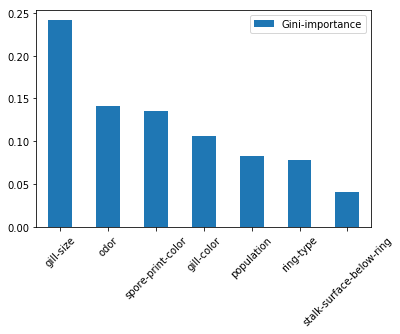

In [59]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(features, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)[:7].plot(kind='bar', rot=45)

# Simple neural net
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
np.random.seed(7)

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from datetime import date

path_to_data = "mushrooms.csv"
df = pd.read_csv(path_to_data)
columns = df.columns.tolist()

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

features = [column for column in columns]
features.remove('veil-type')
features.remove('class')

for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

X = df[features]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_test is {}".format(X_test.shape, y_test.shape))

Shape of X is (8124, 21)
Shape of X_train is (6093, 21) and shape of y_train is (6093,)
Shape of X_test is (2031, 21) and shape of y_test is (2031,)


In [21]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=21, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
hist = model.fit(X, y, epochs=10, batch_size=10, validation_data=(X_test, y_test))

Train on 8124 samples, validate on 2031 samples
Epoch 1/10
8124/8124 [==============================] - 2s 283us/step - loss: 0.4031 - acc: 0.8294 - val_loss: 0.2686 - val_acc: 0.9005
Epoch 2/10
8124/8124 [==============================] - 2s 252us/step - loss: 0.2188 - acc: 0.9242 - val_loss: 0.1848 - val_acc: 0.9355
Epoch 3/10
8124/8124 [==============================] - 2s 266us/step - loss: 0.1517 - acc: 0.9473 - val_loss: 0.1251 - val_acc: 0.9552
Epoch 4/10
8124/8124 [==============================] - 2s 259us/step - loss: 0.0930 - acc: 0.9668 - val_loss: 0.0705 - val_acc: 0.9778
Epoch 5/10
8124/8124 [==============================] - 2s 257us/step - loss: 0.0529 - acc: 0.9844 - val_loss: 0.0436 - val_acc: 0.9887
Epoch 6/10
8124/8124 [==============================] - 2s 256us/step - loss: 0.0304 - acc: 0.9913 - val_loss: 0.0221 - val_acc: 0.9951
Epoch 7/10
8124/8124 [==============================] - 2s 256us/step - loss: 0.0189 - acc: 0.9963 - val_loss: 0.0142 - val_acc: 0.9975


In [27]:
list(zip(hist.history['acc'], hist.history['val_acc']))

[(0.8293943823425715, 0.9005415969620427),
 (0.9241752761124038, 0.9354997463616053),
 (0.9473165857533643, 0.9551944791947838),
 (0.966765135115793, 0.9778434218942444),
 (0.9843673033851641, 0.9886755265959492),
 (0.9912604609626318, 0.9950763159112822),
 (0.9963072370801989, 0.9975381579556412),
 (0.997907434262295, 0.9970457895467694),
 (0.9986459868756026, 1.0),
 (0.9997538157955641, 0.9995076315911282)]

In [19]:
predictions = model.predict(X_test)
y_test_predicted = [round(x[0]) for x in predictions]

print("The fraction of correctly classified samples is {}".format(accuracy_score(y_test, y_test_predicted)))
print("The number of correctly classified samples is {}".format(accuracy_score(y_test, y_test_predicted, normalize=False)))

pd.DataFrame(confusion_matrix(y_test, y_test_predicted), 
             index={'true p', 'true e'}, 
             columns={'pred p', 'pred e'})

The fraction of correctly classified samples is 1.0
The number of correctly classified samples is 2031


,pred p,pred e
true e,1040,0
true p,0,991


# t-sne visualization

In [60]:
import numpy as np
from sklearn.manifold import TSNE
X = df[features]
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(8124, 2)

In [64]:
type(X_embedded)

numpy.ndarray

In [66]:
import seaborn as sns

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


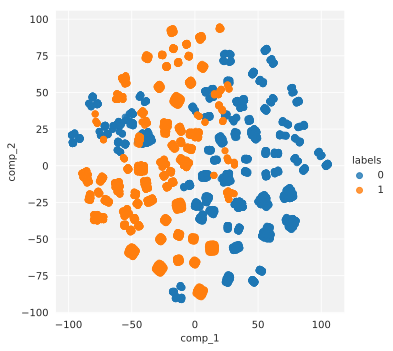

In [70]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(X_embedded)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = df['class']
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(5000) ,fit_reg=False)
print("ready")